In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.cm as cm

In [2]:
df = pd.read_csv(os.getcwd() + '/' + 'result.csv')
df.head()

,S.N.,E,Gam,phi,C,Neu,dil,ExDep,Bfill,Plthk,FAng,Inc,Sp,Len,FOS,Dis
0,1.0,8000.0,19.5,26.0,25.0,0.35,0.0,6.0,0.0,100.0,5.0,15.0,0.5,1.2,2.304,-0.043
1,2.0,8000.0,19.5,26.0,25.0,0.35,0.0,6.0,0.0,100.0,5.0,15.0,0.5,1.0,2.146,-0.046
2,3.0,8000.0,19.5,26.0,25.0,0.35,0.0,6.0,0.0,100.0,5.0,15.0,0.5,0.8,2.004,-0.049
3,4.0,8000.0,19.5,26.0,25.0,0.35,0.0,6.0,0.0,100.0,5.0,15.0,0.7,1.2,2.187,-0.047
4,5.0,8000.0,19.5,26.0,25.0,0.35,0.0,6.0,0.0,100.0,5.0,15.0,0.7,1.0,2.022,-0.049


In [9]:
df.iloc[0, -1]

-0.043

In [10]:
for k in range(2):
    delta_fos = []
    heading = []
    column_values = []
    var=[ ]

    for i in range(len(df)-1):
        for j in range(1,14):
            if df.iloc[(i+1), (j)] != df.iloc[k,(j)]:
                if ((df.iloc[(i+1), 1:-2]).drop(df.columns[j]) == (df.iloc[k,1:-2]).drop(df.columns[j])).all():
                    delta = round(df.iloc[(i+1), -1] - df.iloc[k,-1],3)
                    delta_fos.append(delta)
                    heading.append(df.columns[j])
                    column_values.append(round(df.iloc[(i+1), -1] - df.iloc[k,-1],3))
                    var.append(df.iloc[(i+1), (j)])
        
    # Create a new DataFrame to store the results
    results_df = pd.DataFrame({
        'Heading': heading,
        'Column_Value': column_values,
        'var': var
    })

    # Group by 'Heading' and aggregate 'Column_Value' and 'var'
    grouped_results_df = results_df.groupby('Heading').agg({
        'Column_Value': list,
        'var': list
    }).reset_index()

    # Transpose the DataFrame
    #transposed_grouped_results_df = grouped_results_df.transpose()

    results_df = grouped_results_df

    print(results_df)

  Heading      Column_Value           var
0       C   [-0.006, -0.02]   [15.0, 5.0]
1       E           [-0.01]      [6500.0]
2    FAng           [0.008]        [10.0]
3     Gam  [-0.001, -0.002]  [21.0, 22.5]
4     Len  [-0.003, -0.006]    [1.0, 0.8]
5     Neu           [0.013]         [0.3]
6   Plthk             [0.0]       [200.0]
7      Sp  [-0.004, -0.007]    [0.7, 0.9]
8     phi           [0.006]        [30.0]
  Heading      Column_Value           var
0       C   [-0.007, -0.03]   [15.0, 5.0]
1       E           [-0.01]      [6500.0]
2    FAng           [0.009]        [10.0]
3     Gam  [-0.001, -0.002]  [21.0, 22.5]
4     Len          [-0.003]         [0.8]
5     Neu           [0.013]         [0.3]
6   Plthk             [0.0]       [200.0]
7      Sp  [-0.003, -0.007]    [0.7, 0.9]
8     phi           [0.007]        [30.0]


In [12]:



plt.figure(figsize=(10,6))

colors = cm.rainbow(np.linspace(0, 1, len(results_df)))

for i in range(len(results_df)):  # change this to the actual length of your DataFrame
    x = [0]
    y = [0]
    column_name = results_df.iloc[i,0]
    for j in range(len(results_df.iloc[i,1])):
        x1 = round((results_df.iloc[i,2][j]-df.loc[0,column_name])/df.loc[0,column_name]*100,3)
        y1 = results_df.iloc[i,1][j]
        x.append(x1)
        y.append(y1)

    # If the next data point belongs to a different group, plot the current group and reset x and y
    if i < len(results_df)-1 and results_df.iloc[i,0] != results_df.iloc[i+1,0]:  # change 9 to the actual length of your DataFrame - 1
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        line = slope*np.array(x)+intercept
       2)} degrees') plt.plot(x, line, color=colors[i], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 
        x = []
        y = []

# Plot the last group
if x and y:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*np.array(x)+intercept
    plt.plot(x, line, color=colors[-1], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 2)} degrees')

# Add a horizontal and vertical line at 0
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.axvline(0, color='black', linewidth=0.5, linestyle='dotted')

# Specify the title and labels
plt.title('Line plot of delta_fos')
plt.xlabel('% change')
plt.ylabel('Delta_FOS')

# Display the legend
plt.legend()

plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

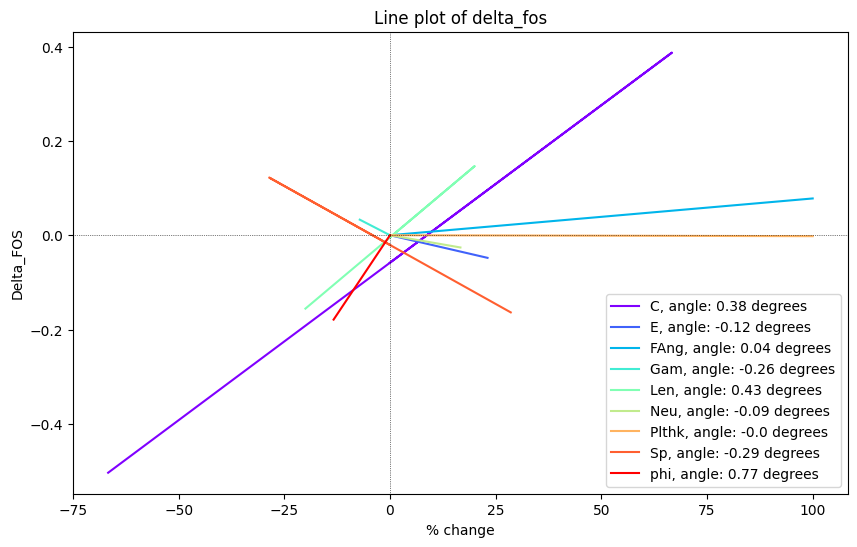

In [40]:


angle_df = pd.DataFrame(columns=['column_name', 'angle'])
index = 0
plt.figure(figsize=(10,6))

colors = cm.rainbow(np.linspace(0, 1, len(results_df)))

for i in range(len(results_df)):  # change this to the actual length of your DataFrame
    x = [0]
    y = [0]
    column_name = results_df.iloc[i,0]
    for j in range(len(results_df.iloc[i,1])):
        x1 = round((results_df.iloc[i,2][j]-df.loc[0,column_name])/df.loc[0,column_name]*100,3)
        y1 = results_df.iloc[i,1][j]
        x.append(x1)
        y.append(y1)

    # If the next data point belongs to a different group, plot the current group and reset x and y
    if i < len(results_df)-1 and results_df.iloc[i,0] != results_df.iloc[i+1,0]:  # change 9 to the actual length of your DataFrame - 1
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        line = slope*np.array(x)+intercept
        plt.plot(x, line, color=colors[i], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 2)} degrees')
        angle_df.loc[index] = [column_name, np.round(np.degrees(np.arctan(slope)), 2)]
        index += 1
        x = []
        y = []

# Plot the last group
if x and y:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*np.array(x)+intercept
    plt.plot(x, line, color=colors[-1], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 2)} degrees')
    angle_df.loc[index] = [column_name, np.round(np.degrees(np.arctan(slope)), 2)]
# Add a horizontal and vertical line at 0
plt.axhline(0, color='black', linewidth=0.5, linestyle='dotted')
plt.axvline(0, color='black', linewidth=0.5, linestyle='dotted')
# Save the DataFrame to a CSV file
angle_df.to_csv('angles.csv', index=False)

# Specify the title and labels
plt.title('Line plot of delta_fos')
plt.xlabel('% change')
plt.ylabel('Delta_FOS')

# Display the legend
plt.legend()

plt.show()

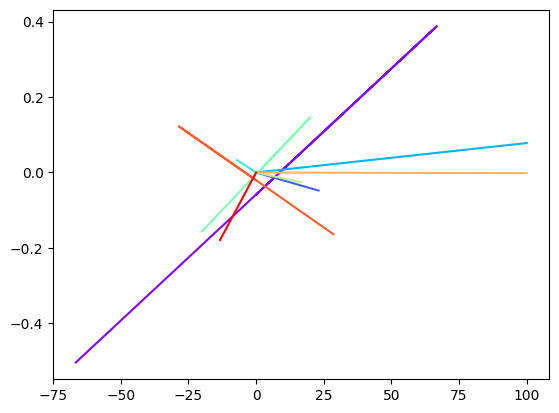

In [39]:
# Create an empty DataFrame to store the angles
angle_df = pd.DataFrame(columns=['column_name', 'angle'])
index = 0

for i in range(len(results_df)):  # change this to the actual length of your DataFrame
    x = [0]
    y = [0]
    column_name = results_df.iloc[i,0]
    for j in range(len(results_df.iloc[i,1])):
        x1 = round((results_df.iloc[i,2][j]-df.loc[0,column_name])/df.loc[0,column_name]*100,3)
        y1 = results_df.iloc[i,1][j]
        x.append(x1)
        y.append(y1)

    # If the next data point belongs to a different group, plot the current group and reset x and y
    if i < len(results_df)-1 and results_df.iloc[i,0] != results_df.iloc[i+1,0]:  # change 9 to the actual length of your DataFrame - 1
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        line = slope*np.array(x)+intercept
        plt.plot(x, line, color=colors[i], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 2)} degrees')
        angle_df.loc[index] = [column_name, np.round(np.degrees(np.arctan(slope)), 2)]
        index += 1
        x = []
        y = []

# Plot the last group
if x and y:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*np.array(x)+intercept
    plt.plot(x, line, color=colors[-1], label=f'{column_name}, angle: {np.round(np.degrees(np.arctan(slope)), 2)} degrees')
    angle_df.loc[index] = [column_name, np.round(np.degrees(np.arctan(slope)), 2)]

# Save the DataFrame to a CSV file
angle_df.to_csv('angles.csv', index=False)